# Seleção de modelos e regularização

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
https://sites.icmc.usp.br/francisco <br>
Copyright: Creative Commons<br>

<hr>


Vamos gerar os dados a partir uma função definida:

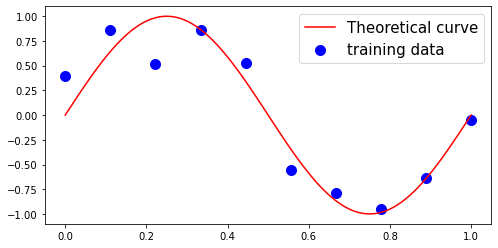

In [1]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(10)

#função para gerar os dados
def function(x):
    y = np.sin(2 * np.pi * x)
    #y = np.cos(2 * np.pi * x)
    #y = x**4 + x**9
    return y

# training set
N_train =10
sigma = 0.3
x_train= np.linspace(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)

fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")

# test set
N_test = 10
x_test=np.linspace(0, 1,N_test)
y_test = function(x_test) +  np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)


# Theoretical curves
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r',  label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)

Os dados que temos acesso são os pontos em azul. A curva em vermelho é desconhecida, mas a mostramos para entender como os dados são gerados.

Vamos fazer o ajuste usando um polinômio de grau $M$. Inicialmente, vamos considerar $M=1$, ou seja, um ajuste linear.

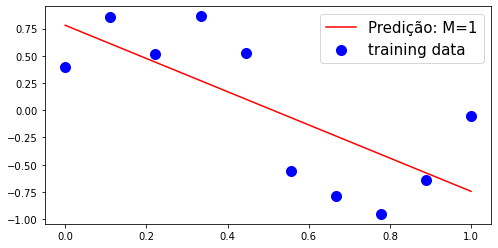

In [2]:
from sklearn import linear_model

# usa regressão linear para ajustar o modelo
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

# preve os valores de y a partir de x
xplot=np.linspace(0,1,200)
xplot=xplot.reshape(len(xplot), 1)
Y_pred = model.predict(xplot)

# mostra os resultados
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=1', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)

In [3]:
x_train

array([[0.        ],
       [0.11111111],
       [0.22222222],
       [0.33333333],
       [0.44444444],
       [0.55555556],
       [0.66666667],
       [0.77777778],
       [0.88888889],
       [1.        ]])

Notamos que, nesse caso, o ajuste é muito ruim, pois os dados foram gerados a partir de uma função não-linear.

Vamos fazer o ajuste usando um polinômio de grau $M=3$. Veja sobre a função para gerar o polinômio no link: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

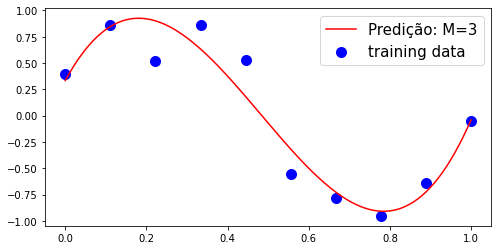

In [4]:
from sklearn.preprocessing import PolynomialFeatures
# Define a matriz de atributos
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x_train) 
model = linear_model.LinearRegression()
model.fit(X,y_train)

# graficamos a curva obtida a partir da predição
Xplot=poly3.fit_transform(xplot)
Y_pred = model.predict(Xplot)
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=3', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)

In [5]:
X

array([[1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.11111111, 0.01234568, 0.00137174],
       [1.        , 0.22222222, 0.04938272, 0.01097394],
       [1.        , 0.33333333, 0.11111111, 0.03703704],
       [1.        , 0.44444444, 0.19753086, 0.0877915 ],
       [1.        , 0.55555556, 0.30864198, 0.17146776],
       [1.        , 0.66666667, 0.44444444, 0.2962963 ],
       [1.        , 0.77777778, 0.60493827, 0.47050754],
       [1.        , 0.88888889, 0.79012346, 0.70233196],
       [1.        , 1.        , 1.        , 1.        ]])

Nesse caso, o ajuste reproduz melhor a tendência observada nos dados.

Vamos verificar para um polinômio de grau $M=9$.

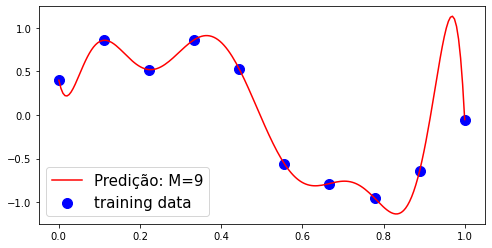

In [6]:
poly9 = PolynomialFeatures(degree=9)
X = poly9.fit_transform(x_train)
model = linear_model.LinearRegression()
model.fit(X,y_train)

Xplot=poly9.fit_transform(xplot)
Y_pred = model.predict(Xplot)
fig = plt.figure(figsize=(8, 4))
plt.plot(xplot, Y_pred, label='Predição: M=9', color = 'red')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=100, 
            label="training data")
plt.legend(fontsize=15)
plt.show(True)

Para um polinômio de grau $M=9$, a curva se ajusta a todos os pontos. Em princícipio, esse parece ser o melhor ajuste.

O ajuste foi feito no conjunto de treinamento. Precisamos agora analisar a capacidade de generalização do modelo. Para isso, vamos fazer a previsão em novos dados, ou seja, no conjunto de teste.

Vamos analisar o erro na predição em função do grau do polinômio. O erro é calculando quando consideramos o conjunto de treinamento e teste, onde obtemos duas curvas distintas.

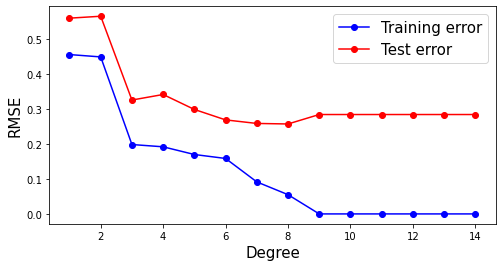

In [7]:
#Funcao para calcular o erro quadrático médio
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

# lista que armazena os erros de acordo com o grau do polinomio
training_errors = []
test_errors = []
degree = [] # armazena os graus do polinomio
for M in np.arange(1,15):   
    # modelo a ser usado: regressão linear
    model = linear_model.LinearRegression()
    # transforma os dados para obter a matriz onde cada coluna i armazena x**i
    poly = PolynomialFeatures(degree=M) 
    X_train = poly.fit_transform(x_train)
    # realiza a regressão linear no conjunto de treinamento
    model.fit(X_train,y_train)
    Y_pred = model.predict(X_train)
    error_train = rmse(Y_pred,y_train)
    training_errors.append(error_train)

    # realiza a regressão linear no conjunto de teste
    X_test=poly.fit_transform(x_test)
    Y_pred2 = model.predict(X_test)
    error_test = rmse(Y_pred2, y_test)
    test_errors.append(error_test)
    degree.append(M)
fig = plt.figure(figsize=(8, 4))
plt.plot(degree, training_errors, 'b-o', label = 'Training error')
plt.plot(degree, test_errors, 'r-o', label= 'Test error')
plt.xlabel("Degree", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)

Notem que o erro na predição, quando usamos o conjunto de teste, tende a aumentar quando aumentamos o grau do polinômio, ou seja, quando aumentamos a complexidade do modelo. Essa é uma indicação de overfitting (veja material da aula teórica). Overfitting ocorre quando há um aumento no erro calculado no conjunto de teste. Notem que o erro no conjunto de treinamento vai a zero quando aumentamos o grau do polinômio. Nesse caso, a curva se ajusta a todos os pontos, como vimos anteriormente para $M = 9$.

Se aumentarmos o número de elementos no conjunto de treinamento, reduzimos o overfitting. Ou seja, precisamos balancear a complexidade do modelo de acordo com o volume de dados disponíveis. Vamos gerar os dados como anteriormente, mas com mais pontos.

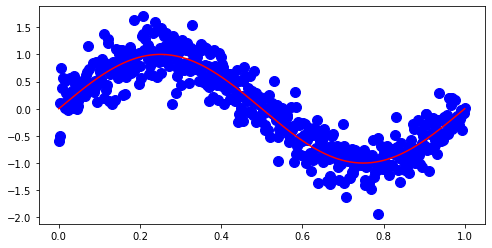

In [8]:
fig = plt.figure(figsize=(8, 4))

N_train = 500
x_train=np.linspace(0, 1,N_train)
y_train = np.sin(2 * np.pi * x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")

# test set
N_test = 500
x_test=np.linspace(0, 1,N_test)
y_test = np.sin(2 * np.pi * x_test) +  np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

# Theoretical curves
xt=np.linspace(0, 1,N_test)
yt = np.sin(2 * np.pi * xt) 
plt.plot(xt,yt, '-r')
plt.show(True)

Para um polinômio de grau $M=9$, vemos que com mais pontos, overfitting deixa de ocorrer.

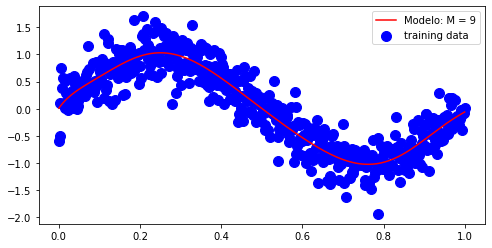

In [9]:
fig = plt.figure(figsize=(8, 4))

poly9 = PolynomialFeatures(degree=9)
X = poly9.fit_transform(x_train)
clf9 = linear_model.LinearRegression()
clf9.fit(X,y_train)

Xplot=poly9.fit_transform(xplot)
Y_pred = clf9.predict(Xplot)
plt.plot(xplot, Y_pred, '-r',  label='Modelo: M = 9')
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", 
            s=100, label="training data")
plt.legend()
plt.show(True)

Além disso, podemos até usar polinômios de grau maior. Analisando o erro em função do grau do polinômio, vemos que ocorre overfitting apenas para polinômios de grau muito alto.

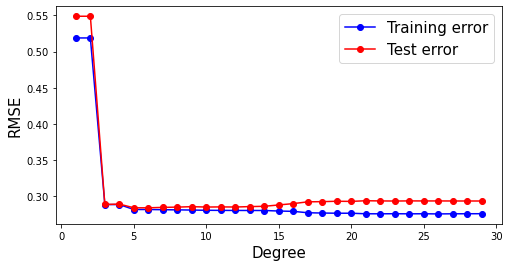

In [10]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []
degree = []
for M in np.arange(1,30):    
    poly = PolynomialFeatures(degree=M)
    X_train = poly.fit_transform(x_train)
    clf = linear_model.LinearRegression()
    clf.fit(X_train,y_train)
    Y_pred = clf.predict(X_train)
    error_train = rmse(Y_pred,y_train)
    training_errors.append(error_train)
    
    X_test=poly.fit_transform(x_test)
    Y_pred2 = clf.predict(X_test)
    error_test = rmse(Y_pred2, y_test)
    test_errors.append(error_test)
    degree.append(M)
fig = plt.figure(figsize=(8, 4))
plt.plot(degree, training_errors, 'b-o', label = 'Training error')
plt.plot(degree, test_errors, 'r-o', label= 'Test error')
plt.xlabel("Degree", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)

Ou seja, quanto mais dados estiverem disponíveis, maior pode ser a complexidade do modelo. Temos que ter uma balanço entre complexidade do modelo e dados disponíveis.

## Validação cruzada

O método de validação cruzada é usado na escolha do modelo. Além disso, podemos usar o método para escolher o melhor conjunto de parâmetros de um classificador ou regressor. Notem que os dados são divididos em dois conjuntos, um de teste e outro de treinamento. Aplicamos validação cruzada ao conjunto de treinamento, para posterior avaliação do modelo no conjunto de teste.

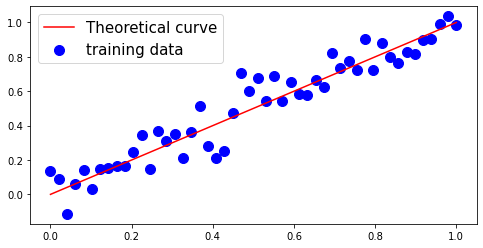

In [11]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(10)

#função para gerar os dados
def function(x):
    #y = np.sin(2 * np.pi * x)
    #y = np.cos(2 * np.pi * x)
    #y = x**4 + x**9
    y = x 
    return y

N = 50
sigma = 0.1
X = np.linspace(0, 1,N)
y = function(X) + np.random.normal(0,sigma, N)
X = X.reshape(len(X), 1)

fig = plt.figure(figsize=(8, 4))
plt.scatter(X, y, facecolor="blue", edgecolor="b", s=100, label="training data")

# Theoretical curves
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r',  label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)



A validação cruzada aninhada:

In [12]:
# Pandas is used for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


n_folds = 3
k_folds = 10
cv_outer = KFold(n_folds, shuffle=True)
verror = list()
vR2 = list()
# CV external lood
y_out = []
for train_i, test_i in cv_outer.split(X):
    X_train, y_train = X[train_i], y[train_i]
    X_test, y_test = X[test_i], y[test_i]
    # internal CV (training and validation sets)
    model = LinearRegression()
    hparameters = {}
    grid_search_cv = GridSearchCV(model, hparameters, cv=k_folds, scoring='neg_mean_squared_error', refit=True)
    # find the best hyperparameters
    result = grid_search_cv.fit(X_train, y_train)
    best_model = result.best_estimator_
    # prediction in the test fold
    y_pred = best_model.predict(X_test) 
    # evaluate and store the results
    error = metrics.mean_squared_error(y_test,y_pred)
    R2 = metrics.r2_score(y_test,y_pred)
    print("Mean Square Error:", error)
    print("R2:", R2)
    verror.append(error)
    vR2.append(R2)
    #print('Best hyperparameters (extern): ', result.best_params_)
    #print('.',end="")
    y_out.append((y_pred, y_test))
        
print('\n')
av_error = np.mean(verror)
std_error = np.std(verror)
av_R2 = np.mean(vR2)
std_R2 = np.std(vR2)
print('Error:', av_error, 'Std error:', std_error)
print('av_R2:', av_R2, 'std_R2:', std_R2)


Mean Square Error: 0.006391669460606893
R2: 0.9273528794536274
Mean Square Error: 0.010764972716098851
R2: 0.8591720809676807
Mean Square Error: 0.010838380358244595
R2: 0.8609763610638499


Error: 0.00933167417831678 Std error: 0.0020791132686153557
av_R2: 0.8825004404950527 std_R2: 0.031724016318512425


## Seleção de modelos

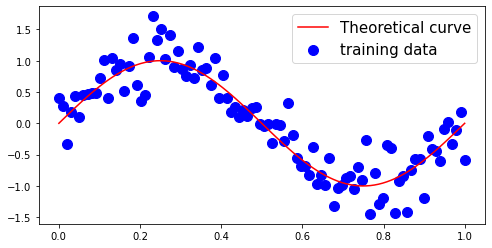

In [13]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(10)

#função para gerar os dados
def function(x):
    y = np.sin(2 * np.pi * x)
    #y = np.cos(2 * np.pi * x)
    #y = x**4 + x**9
    #y = x 
    return y

N = 100
sigma = 0.3
X = np.linspace(0, 1,N)
y = function(X) + np.random.normal(0,sigma, N)
X = X.reshape(len(X), 1)

fig = plt.figure(figsize=(8, 4))
plt.scatter(X, y, facecolor="blue", edgecolor="b", s=100, label="training data")

# Theoretical curves
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r',  label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)

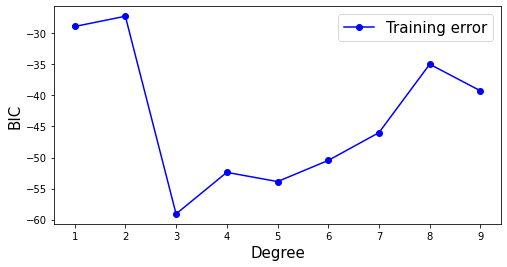

In [14]:
# Pandas is used for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from math import log

def calculate_bic(n, mse, num_params):
	bic = n * log(mse) + num_params * log(n)
	return bic

n_folds = 3
k_folds = 10
vM = []
vav_bic = []
for M in np.arange(1,10):   
    poly = PolynomialFeatures(degree=M) 
    X_poly = poly.fit_transform(X)
    cv_outer = KFold(n_folds, shuffle=True)
    vbic = list()
    # CV external lood
    y_out = []
    for train_i, test_i in cv_outer.split(X_poly):
        X_train, y_train = X_poly[train_i], y[train_i]
        X_test, y_test = X_poly[test_i], y[test_i]
        # internal CV (training and validation sets)
        model = LinearRegression()
        hparameters = {}
        grid_search_cv = GridSearchCV(model, hparameters, cv=k_folds, scoring='neg_mean_squared_error', refit=True)
        # find the best hyperparameters
        result = grid_search_cv.fit(X_train, y_train)
        best_model = result.best_estimator_
        # prediction in the test fold
        yhat = best_model.predict(X_test) 
        # evaluate and store the results
        num_params =  len(best_model.coef_)+1
        mse = mean_squared_error(y_test, yhat)
        bic = calculate_bic(len(y_test), mse, num_params)
        vbic.append(bic)
        #print('.',end="")
        y_out.append((yhat, y_test))
        
    #print('\n')
    av_bic = np.mean(vbic)
    std_bic = np.std(vbic)
    vM.append(M)
    vav_bic.append(av_bic)
    #print('M:', M, 'BIC:', av_bic, 'Std bic:', std_bic)
fig = plt.figure(figsize=(8, 4))
plt.plot(vM, vav_bic, 'b-o', label = 'Training error')
plt.xlabel("Degree", fontsize = 15)
plt.ylabel("BIC", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)

# Dados

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# le os dados
data = pd.read_csv('data/BostonHousing.csv', header=(0))
# valor a ser predito
ylabel = data.columns[-1]
print("Número de linhas e colunas:", data.shape)
data.head(10)

Número de linhas e colunas: (506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [16]:
from sklearn.datasets import load_boston
import statsmodels.api as sm

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

#X, y = load_boston(return_X_y=True)
# Features: crim, zn, indus, chas
X1 = X[:, [0,1,2,3]]
# Features: crim, age, rad, tax, ptratio, b,lstat
X2 = X[:, [0,6,8,9,10,11]]

X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1).fit()
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()

print('AIC:')
print("Model1 AIC: {}".format(model1.aic))
print("Model2 AIC: {}".format(model2.aic))
print('BIC:')
print("Model1 BIC: {}".format(model1.bic))
print("Model2 BIC: {}".format(model2.bic))

AIC:
Model1 AIC: 3488.1950318455874
Model2 AIC: 3419.26920868763
BIC:
Model1 BIC: 3509.3277151920247
Model2 BIC: 3448.8549653726423


# Regularização

## Ridge regression

Vamos considerar dados sobre propaganda em rádio, televisão e jornais. Estamos interessados em determinar se o investimento em propaganda aumenta as vendas e, em caso afirmativo, qual seria o veículo de divulgação mais vantajoso.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# leitura dos dados
data = pd.read_csv('data/Advertising.csv', header=(0))
# remove nan (Not a Number)
data = data.dropna()
data = data.drop(data.columns[[0]], axis=1) # remove the first column (if useless)
# define a variável de saída
ylabel = data.columns[-1]

print('Número de observações e atributos:',data.shape)
list_labels = list(data.columns)
data.head(10)

Número de observações e atributos: (200, 4)


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [33]:
# Converte os dados para numpy para facilitar a manipulação
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Ajustando o modelo de regressão múltipla simples.

In [34]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
p = 0.3 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# modelo de regressão linear múltipla
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          # Calculate the test MSE

RSME: 3.796797236715219


In [36]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.8609466508230368


Notem que esse resultado é o mesmo se aplicarmos a função Ridge com alpha = 0.

In [22]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# ajusta o modelo ridge regression
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = ridge2.predict(x_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          # Calculate the test MSE

RSME: 3.7967972367152147


Podemos mostrar a predição e os valores originais para $\alpha > 0$.

In [37]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# ajusta o modelo ridge regression
ridge2 = Ridge(alpha = 1, normalize = True)
ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = ridge2.predict(x_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)
print("RSME:", RSME)          # Calculate the test MSE

RSME: 9.712800436520261


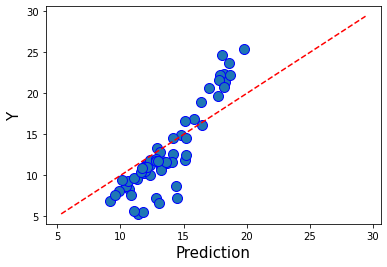

In [39]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("Y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

#plt.grid(True)
plt.show(True)

O coeficiente R2 quantifica a qualidade do ajuste.

In [40]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)
adjusted_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print('Adjusted R2:', adjusted_R2)

R2: 0.6442798110140653
Adjusted R2: 0.6252233723183902


No modelo ridge regression, temos que o parâmetro $\gamma > 0$. Vamos analisar como o coeficiente R2 varia de acordo com $\gamma$.

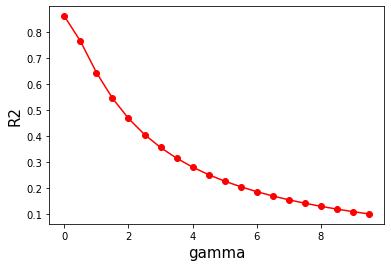

In [44]:
vR2 = []
vgamma = []
# variamos os valaores de alpha
for gamma in np.arange(0,10,0.5):
    ridge2 = Ridge(alpha = gamma, normalize = True)
    ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = ridge2.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    vgamma.append(gamma)
plt.plot(vgamma, vR2, '-ro')
plt.xlabel("gamma", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

Para $\gamma > 0$, o coeficiente R2 diminui, indicando que o ajuste tradicional, para $\gamma = 0$, resulta em um resultado melhor. 

Ou seja, para esse conjunto de dados, a melhor opção é considerar a regressão linear simples.

### LASSO

Usando os dados anteriores, vamos aplicar o método Lasso (least absolute shrinkage and selection operator) aos dados.

In [45]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = 0.1
# notice that we need to normalize the attributes: normalize = True
lasso = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = lasso.predict(x_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)         # Calculate the test MSE
print('RSME:', RSME)

RSME: 6.064528083772852


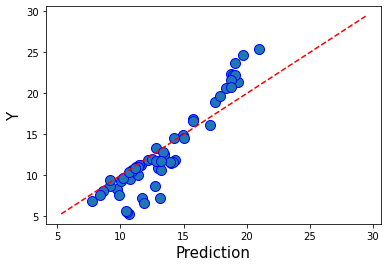

In [46]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("Y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

#plt.grid(True)
plt.show(True)

In [48]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print("R2:", R2)          # Calculate the test MSE
adjusted_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print('Adjusted R2:', adjusted_R2)

R2: 0.7778936064660812
Adjusted R2: 0.7659950496696213


Vemos que o valor de R2 é menor do que o obtido nos exemplos anteriores, indicando que para os dados que estamos analisando, a regressão simples oferece o melhor resultado.

Variando alpha, vemos que o coeficiente R2 diminui ainda mais.

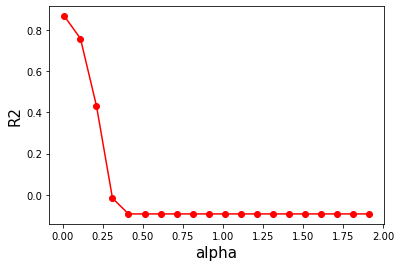

In [49]:
vR2 = []
valpha = []
for alpha in np.arange(0.01,2,0.1):
    lasso = Lasso(alpha = alpha, normalize = True)
    lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = lasso.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

No método Lasso, podemos calcular os coeficientes de modo a selecionar os atributos mais importantes. Se algum atributo apresentar os respectivo coeficiente igual a zero, então esse atributo não contribui para a regressão.

In [50]:
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
print('Coeficientes: TV, radio, newspaper')
lasso.coef_

Coeficientes: TV, radio, newspaper


array([0.03079952, 0.12648918, 0.        ])

Ou seja, vemos que a variável newspaper recebeu peso igual a zero, indicando que não é importante na predição. Portanto, não vale a pena investir em anúncios em jornais, pois o ganho nas vendas pode ser obtido com investimentos em TV e radio.

## Exercícios de fixação

1 - Considere a base BostonHousing. Compare o coeficiente R2 obtido através de regressão linear múltipla, Lasso e ridge regression. Para os métodos Lasso e ridge regression, faça um gráfico de $\alpha \times$ R2 como foi feito nos exemplos anteriores.

2 - Para os dados gerados pelo código abaixo, ajuste um modelo de regressão não-linear considerando um polinômio de grau 3, conforme feito na aula.

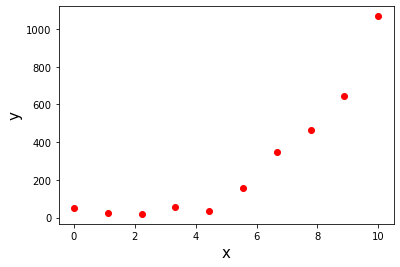

In [78]:
import numpy as np
from sklearn.linear_model import LinearRegression

N = 10
x = np.linspace(0,10,N)
y = x**3 + np.random.normal(0,50, N)
plt.plot(x,y, 'ro')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.show(True)

3 - Determine as variáveis que mais influenciam o preço de imóveis em Boston usando Lasso.

# Leitura adicional

https://machinelearningmastery.com/probabilistic-model-selection-measures/

https://towardsdatascience.com/model-selection-assessment-bb2d74229172

https://medium.com/analytics-vidhya/probabilistic-model-selection-with-aic-bic-in-python-f8471d6add32

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html

https://stats.stackexchange.com/questions/577/is-there-any-reason-to-prefer-the-aic-or-bic-over-the-other

https://stats.stackexchange.com/questions/146804/difference-between-statsmodel-ols-and-scikit-linear-regression